In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Importing dataset

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


Text(0.5, 1.0, 'SEX-WISE STATS')

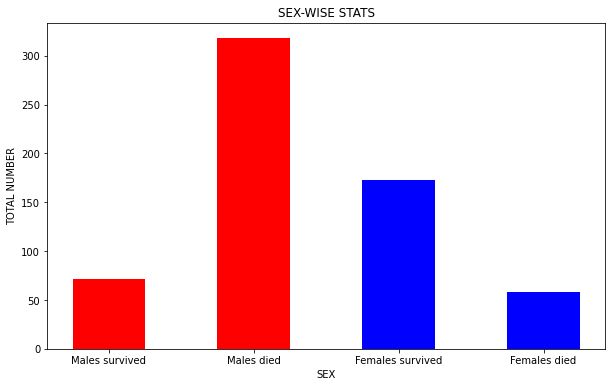

In [3]:
#Analyzing Survival Rate with parameter 'Sex'

mcount0 = mcount1 = fcount0 = fcount1 = 0
for i in range(0 , len(df)):
    if df.iat[i,3] == "male":
        if df.iat[i,1] == 1:
            mcount1 = mcount1 + 1
        else:
            mcount0 = mcount0 + 1  
    else:
        if df.iat[i,1] == 1:
            fcount1 = fcount1 + 1
        else:
            fcount0 = fcount0 + 1

#print(f"{mcount1 + mcount0 + fcount1 + fcount0}")
dataset = list(("Males survived","Males died","Females survived","Females died"))     
count = list((mcount1,mcount0,fcount1,fcount0))
plt.figure(figsize = (10,6))
plt.bar(dataset, count, color =['red','red','blue','blue'],width = 0.5)
plt.xlabel("SEX")
plt.ylabel("TOTAL NUMBER")
plt.title("SEX-WISE STATS")
#plt.show()

Text(0.5, 1.0, 'CLASS-WISE STATS')

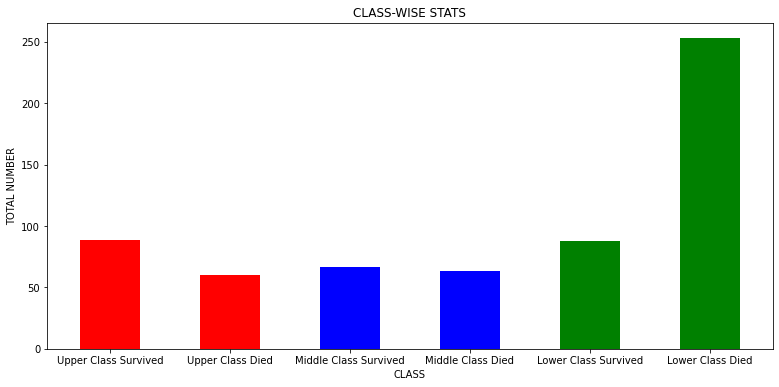

In [4]:
#Analyzing Survival Rate with parameter 'PClass'

Pclass10 = Pclass11 = Pclass20 = Pclass21 = Pclass30 = Pclass31 = 0
for i in range(0 , len(df)):
    if df.iat[i,2] == 1:
        if df.iat[i,1] == 1:
            Pclass11 = Pclass11 + 1
        else:
            Pclass10 = Pclass10 + 1  
    elif df.iat[i,2] == 2:
        if df.iat[i,1] == 1:
            Pclass21 = Pclass21 + 1
        else:
            Pclass20 = Pclass20 + 1
    elif df.iat[i,2] == 3:
        if df.iat[i,1] == 1:
            Pclass31 = Pclass31 + 1
        else:
            Pclass30 = Pclass30 + 1

#print(f"{Pclass10 + Pclass11 +Pclass20 + Pclass21 + Pclass30 + Pclass31}")
dataset1 = list(("Upper Class Survived","Upper Class Died","Middle Class Survived","Middle Class Died","Lower Class Survived","Lower Class Died"))     
count1 = list((Pclass11,Pclass10,Pclass21,Pclass20,Pclass31,Pclass30))
plt.figure(figsize = (13,6))
plt.bar(dataset1, count1, color =['red','red','blue','blue','green','green'],width = 0.5)
#for dataset1, count1 in enumerate(count1):
    #plt.text(count1, dataset1, str(value))
plt.xlabel("CLASS")
plt.ylabel("TOTAL NUMBER")
plt.title("CLASS-WISE STATS")
#plt.show()

Text(0.5, 1.0, 'FARE-WISE SURVIVED STATS')

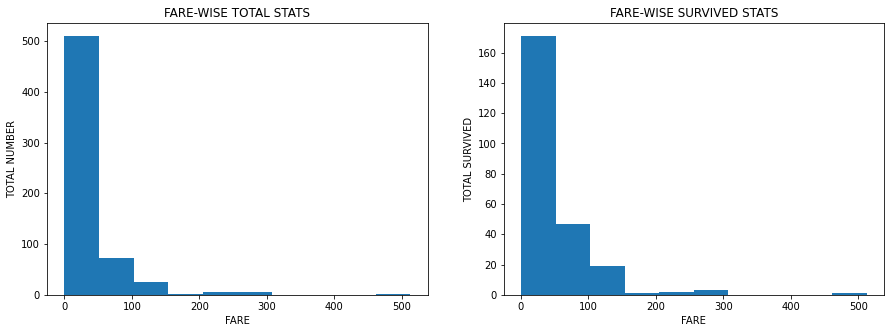

In [5]:
#Analyzing Survival Rate with parameter 'Fare'
fare_data = df["Fare"]

plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plt.hist(fare_data)
plt.xlabel("FARE")
plt.ylabel("TOTAL NUMBER")
plt.title("FARE-WISE TOTAL STATS")

fare_alive = []
for i in range(0 , len(df)):
    if df.iat[i,1] == 1:
        fare_alive.append(df.iat[i,7])

plt.subplot(1, 2, 2)
plt.hist(fare_alive)
plt.xlabel("FARE")
plt.ylabel("TOTAL SURVIVED")
plt.title("FARE-WISE SURVIVED STATS")

#plt.show()

# Important Data
All the data seems important for predicting the values of 'Survived'<br />
In the 3rd Graph, around 500 people are in the '0-50' fare but only around 170 survive. Whereas around 80 people are in the '50-100' fare but around 50 survive. So 'Fare' can be important criteria too.<br />
We will remove the 'PassengerId' column and use the rest of the data.

In [6]:
#Converting males to 1 and females to 0 to get data in int
for i in range(0 , len(df)):
    if df.iat[i,3] == "male":
        df.iat[i,3] = int(1)
    else:
        df.iat[i,3] = int(0)

In [7]:
df1 = df.fillna(0)
df2 = df.dropna()

Mean_age = round(df2["Age"].mean())
df3 = df
df3["Age"].fillna(Mean_age, inplace = True)
df3["Sex"] = df1["Sex"]
for i in range(0 , len(df3)):  
    df3.iat[i,4] = round(df3.iat[i,4])

df3 = df3.drop(['PassengerId'],axis=1)
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [8]:
# Entropy(S) = - ∑ pᵢ * log₂(pᵢ) ; i = 1 to n

# IG(S, A) = Entropy(S) - ∑((|Sᵥ| / |S|) * Entropy(Sᵥ))

In [9]:
#Entropy of survived
from math import log2
survived1 = survived0 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0:
        survived0 += 1
    else:
        survived1 += 1
total = 620

entropy =  -(survived0/total)*log2(survived0/total) - (survived1/total)*log2(survived1/total)
print(entropy)

0.9670513107643408


In [10]:
#Information Gain of Pclass
survived11 = survived01 = survived12 = survived02 = survived13 = survived03 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,1] == 1:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,1] == 1:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,1] == 2:
        survived02 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,1] == 2:
        survived12 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,1] == 3:
        survived03 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,1] == 3:
        survived13 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p02 = survived02/(survived02+survived12)
p12 = survived12/(survived02+survived12)
p03 = survived03/(survived03+survived13)
p13 = survived13/(survived03+survived13)
entropy_pclass1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_pclass2 =  -p02*log2(p02) - (p12)*log2(p12)
entropy_pclass3 =  -p03*log2(p03) - (p13)*log2(p13)

IG_pclass = entropy - ((survived01+survived11)/total)*entropy_pclass1 - ((survived02+survived12)/total)*entropy_pclass2 - ((survived03+survived13)/total)*entropy_pclass3 
print(IG_pclass)

0.0707071653314773


In [11]:
#Information Gain of Sex
survived11 = survived01 = survived10 = survived00 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 1:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 0:
        survived00 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0:
        survived10 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p00 = survived00/(survived00+survived10)
p10 = survived10/(survived00+survived10)
entropy_sex1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_sex0 =  -p00*log2(p00) - (p10)*log2(p10)

IG_sex = entropy - ((survived01+survived11)/total)*entropy_sex1 - ((survived00+survived10)/total)*entropy_sex0
print(IG_sex)

0.23401539075961825


In [12]:
#Information Gain of SibSp
survived11 = survived01 = survived10 = survived00 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,5] != 0:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,5] != 0:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,5] == 0:
        survived00 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,5] == 0:
        survived10 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p00 = survived00/(survived00+survived10)
p10 = survived10/(survived00+survived10)
entropy_sibsp1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_sibsp0 =  -p00*log2(p00) - (p10)*log2(p10)

IG_sibsp = entropy - ((survived01+survived11)/total)*entropy_sibsp1 - ((survived00+survived10)/total)*entropy_sibsp0
print(IG_sibsp)

0.01195827672813432


In [13]:
#Information Gain of Parch
survived11 = survived01 = survived10 = survived00 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,6] != 0:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,6] != 0:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,6] == 0:
        survived00 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,6] == 0:
        survived10 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p00 = survived00/(survived00+survived10)
p10 = survived10/(survived00+survived10)
entropy_parch1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_parch0 =  -p00*log2(p00) - (p10)*log2(p10)

IG_parch = entropy - ((survived01+survived11)/total)*entropy_parch1 - ((survived00+survived10)/total)*entropy_parch0
print(IG_parch)

0.004226241462664832


In [14]:
print(df3.to_string())

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare
0           0       3    1  22.0      1      0    7.2500
1           1       1    0  38.0      1      0   71.2833
2           1       3    0  26.0      0      0    7.9250
3           1       1    0  35.0      1      0   53.1000
4           0       3    1  35.0      0      0    8.0500
5           0       3    1  30.0      0      0    8.4583
6           0       1    1  54.0      0      0   51.8625
7           0       3    1   2.0      3      1   21.0750
8           1       3    0  27.0      0      2   11.1333
9           1       2    0  14.0      1      0   30.0708
10          1       3    0   4.0      1      1   16.7000
11          1       1    0  58.0      0      0   26.5500
12          0       3    1  20.0      0      0    8.0500
13          0       3    1  39.0      1      5   31.2750
14          0       3    0  14.0      0      0    7.8542
15          1       2    0  55.0      0      0   16.0000
16          0       3    1   2.

IG is max for sex. Hence it forms the root node

In [15]:
#Entropy of survived males
from math import log2
survived1 = survived0 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 1:
        survived0 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1:
        survived1 += 1
total = survived0 + survived1

entropy_males =  -(survived0/total)*log2(survived0/total) - (survived1/total)*log2(survived1/total)
print(entropy_males)

0.6855573854354017


In [16]:
#Information Gain of Pclass for sex = 1 (males)
survived11 = survived01 = survived12 = survived02 = survived13 = survived03 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 1 and df3.iat[i,1] == 1:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1 and df3.iat[i,1] == 1:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 1 and df3.iat[i,1] == 2:
        survived02 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1 and df3.iat[i,1] == 2:
        survived12 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 1 and df3.iat[i,1] == 3:
        survived03 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1 and df3.iat[i,1] == 3:
        survived13 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p02 = survived02/(survived02+survived12)
p12 = survived12/(survived02+survived12)
p03 = survived03/(survived03+survived13)
p13 = survived13/(survived03+survived13)
entropy_pclass1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_pclass2 =  -p02*log2(p02) - (p12)*log2(p12)
entropy_pclass3 =  -p03*log2(p03) - (p13)*log2(p13)

IG_pclass = entropy_males - ((survived01+survived11)/total)*entropy_pclass1 - ((survived02+survived12)/total)*entropy_pclass2 - ((survived03+survived13)/total)*entropy_pclass3 
print(IG_pclass)

0.021799858327294086


In [17]:
#Information Gain of SibSp for sex = 1 (males)
survived11 = survived01 = survived10 = survived00 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 1 and df3.iat[i,5] != 0:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1 and df3.iat[i,5] != 0:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 1 and df3.iat[i,5] == 0:
        survived00 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1 and df3.iat[i,5] == 0:
        survived10 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p00 = survived00/(survived00+survived10)
p10 = survived10/(survived00+survived10)
entropy_sibsp1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_sibsp0 =  -p00*log2(p00) - (p10)*log2(p10)

IG_sibsp = entropy_males - ((survived01+survived11)/total)*entropy_sibsp1 - ((survived00+survived10)/total)*entropy_sibsp0
print(IG_sibsp)

0.007925487163143008


In [18]:
#Information Gain of Parch for sex = 1 (males)
survived11 = survived01 = survived10 = survived00 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 1 and df3.iat[i,6] != 0:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1 and df3.iat[i,6] != 0:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 1 and df3.iat[i,6] == 0:
        survived00 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 1 and df3.iat[i,6] == 0:
        survived10 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p00 = survived00/(survived00+survived10)
p10 = survived10/(survived00+survived10)
entropy_parch1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_parch0 =  -p00*log2(p00) - (p10)*log2(p10)

IG_parch = entropy_males - ((survived01+survived11)/total)*entropy_parch1 - ((survived00+survived10)/total)*entropy_parch0
print(IG_parch)

0.0006574385007494209


for males, IG is max for pclass

In [19]:
#Entropy of survived females
from math import log2
survived1 = survived0 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 0:
        survived0 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0:
        survived1 += 1
total = survived0 + survived1

entropy_females =  -(survived0/total)*log2(survived0/total) - (survived1/total)*log2(survived1/total)
print(entropy_females)

0.8129889500803325


In [20]:
#Information Gain of Pclass for sex = 0 (females)
survived11 = survived01 = survived12 = survived02 = survived13 = survived03 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 0 and df3.iat[i,1] == 1:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0 and df3.iat[i,1] == 1:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 0 and df3.iat[i,1] == 2:
        survived02 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0 and df3.iat[i,1] == 2:
        survived12 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 0 and df3.iat[i,1] == 3:
        survived03 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0 and df3.iat[i,1] == 3:
        survived13 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p02 = survived02/(survived02+survived12)
p12 = survived12/(survived02+survived12)
p03 = survived03/(survived03+survived13)
p13 = survived13/(survived03+survived13)
entropy_pclass1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_pclass2 =  -p02*log2(p02) - (p12)*log2(p12)
entropy_pclass3 =  -p03*log2(p03) - (p13)*log2(p13)

IG_pclass = entropy_females - ((survived01+survived11)/total)*entropy_pclass1 - ((survived02+survived12)/total)*entropy_pclass2 - ((survived03+survived13)/total)*entropy_pclass3 
print(IG_pclass)

0.18339214806854787


In [21]:
#Information Gain of SibSp for sex = 0 (females)
survived11 = survived01 = survived10 = survived00 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 0 and df3.iat[i,5] != 0:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0 and df3.iat[i,5] != 0:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 0 and df3.iat[i,5] == 0:
        survived00 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0 and df3.iat[i,5] == 0:
        survived10 += 1

p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p00 = survived00/(survived00+survived10)
p10 = survived10/(survived00+survived10)
entropy_sibsp1 =  -p01*log2(p01) - (p11)*log2(p11)
entropy_sibsp0 =  -p00*log2(p00) - (p10)*log2(p10)

IG_sibsp = entropy_females - ((survived01+survived11)/total)*entropy_sibsp1 - ((survived00+survived10)/total)*entropy_sibsp0
print(IG_sibsp)

0.008160326699283627


In [22]:
#Information Gain of Parch for sex = 0 (females)
survived11 = survived01 = survived10 = survived00 = 0
for i in range(0,len(df3)):
    if df3.iat[i,0] == 0 and df3.iat[i,2] == 0 and df3.iat[i,6] != 0:
        survived01 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0 and df3.iat[i,6] != 0:
        survived11 += 1
    elif df3.iat[i,0] == 0 and df3.iat[i,2] == 0 and df3.iat[i,6] == 0:
        survived00 += 1
    elif df3.iat[i,0] == 1 and df3.iat[i,2] == 0 and df3.iat[i,6] == 0:
        survived10 += 1
p01 = survived01/(survived01+survived11)
p11 = survived11/(survived01+survived11)
p00 = survived00/(survived00+survived10+0.1)
p10 = survived10/(survived00+survived10+0.1)
entropy_parch1 =  -p01*log2(p01+0.001) - (p11)*log2(p11+0.001)
entropy_parch0 =  -p00*log2(p00+0.001) - (p10)*log2(p10+0.001)

IG_parch = entropy_females - ((survived01+survived11)/total)*entropy_parch1 - ((survived00+survived10)/total)*entropy_parch0
print(IG_parch)

0.0028815624041664822


for females, IG is max for pclass

In [23]:
#for i in range(0,620):
#    predictions.append(2)
j = 0
predictions = []
for i in range(0,len(df3)):
    if df3.iat[i,2] == 0:
        if df3.iat[i,1] == 3:
            predictions.append(1)
        elif df3.iat[i,1] == 2:
            predictions.append(1)
        elif df3.iat[i,1] == 1:
            predictions.append(0)
    elif df3.iat[i,2] == 1:
        if df3.iat[i,1] == 3:
            predictions.append(1)
        elif df3.iat[i,1] == 2:
            predictions.append(0)
        elif df3.iat[i,1] == 1:
            predictions.append(0)
    j = j + 1

df3['Predictions'] = predictions
df_train = df3[['Survived','Predictions']]
print(df_train.to_string())

     Survived  Predictions
0           0            1
1           1            0
2           1            1
3           1            0
4           0            1
5           0            1
6           0            0
7           0            1
8           1            1
9           1            1
10          1            1
11          1            0
12          0            1
13          0            1
14          0            1
15          1            1
16          0            1
17          1            0
18          0            1
19          1            1
20          0            0
21          1            0
22          1            1
23          1            0
24          0            1
25          1            1
26          0            1
27          0            0
28          1            1
29          0            1
30          0            0
31          1            0
32          1            1
33          0            0
34          0            0
35          0            0
3

In [24]:
#Defining accuracy, log loss and F1 score
# df is a dataframe with 3 columns: (i)'Survived' : real values (ii)'Predicted values' : rounded off to 0 and 1
#(iii)'Real Predicted values' : without rounding off

def review(df):
    
    true_pos = true_neg = false_pos = false_neg = 0
    
    for i in range(0,len(df)):
        if df.iat[i,0] == 0 and df.iat[i,1] == 0:
            true_neg += 1
        if df.iat[i,0] == 1 and df.iat[i,1] == 1:
            true_pos += 1
        if df.iat[i,0] == 0 and df.iat[i,1] == 1:
            false_pos += 1
        if df.iat[i,0] == 1 and df.iat[i,1] == 0:
            false_neg += 1
    
    # Calculating accuracy
    accuracy = ((true_pos + true_neg)*100)/len(df)
    print("Accuracy : ", round(accuracy, 3), "%")
    
    # Our cost function is same as log losses by defination. However, I have still calculated it mathematically below
    from math import log
    sum = 0
    for i in range(0,len(df)):
        Y = df.iat[i,0]
        p = df.iat[i,1]
        sum = sum + Y*log(p + 0.000001) + (1-Y)*log(1-p + 0.000001)
    loss = -(sum)/len(df)
    print("Log Loss : ", round(loss, 3))
    
    # Calculating F1 score
    f1 = true_pos/(true_pos + (false_pos + false_neg)/2)
    print("F1 Score : ", round(f1, 3))

In [25]:
review(df_train)

Accuracy :  42.097 %
Log Loss :  8.0
F1 Score :  0.442


# Review

In [26]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000


In [27]:
for i in range(0 , len(df_test)):
    if df_test.iat[i,3] == "male":
        df_test.iat[i,3] = 1
    else:
        df_test.iat[i,3] = 0

df1_test = df_test.fillna(0)
df2_test = df_test.dropna()

Mean_age = int(df2_test["Age"].mean())
df3_test = df_test
df3_test["Age"].fillna(Mean_age, inplace = True)
df3_test["Sex"] = df1_test["Sex"]
for i in range(0 , len(df3_test)):  
    df3_test.iat[i,4] = round(df3_test.iat[i,4])
    
print(df3_test.to_string())

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare
0            621         0       3    1  27.0      1      0   14.4542
1            622         1       1    1  42.0      1      0   52.5542
2            623         1       3    1  20.0      1      1   15.7417
3            624         0       3    1  21.0      0      0    7.8542
4            625         0       3    1  21.0      0      0   16.1000
5            626         0       1    1  61.0      0      0   32.3208
6            627         0       2    1  57.0      0      0   12.3500
7            628         1       1    0  21.0      0      0   77.9583
8            629         0       3    1  26.0      0      0    7.8958
9            630         0       3    1  29.0      0      0    7.7333
10           631         1       1    1  80.0      0      0   30.0000
11           632         0       3    1  51.0      0      0    7.0542
12           633         1       1    1  32.0      0      0   30.5000
13           634    

In [28]:
j = 0
predictions_test = []
for i in range(0,len(df3_test)):
    if df3_test.iat[i,3] == 0:
        if df3_test.iat[i,2] == 3:
            predictions_test.append(1)
        elif df3_test.iat[i,2] == 2:
            predictions_test.append(1)
        elif df3_test.iat[i,2] == 1:
            predictions_test.append(0)
    elif df3_test.iat[i,3] == 1:
        if df3_test.iat[i,2] == 3:
            predictions_test.append(1)
        elif df3_test.iat[i,2] == 2:
            predictions_test.append(0)
        elif df3_test.iat[i,2] == 1:
            predictions_test.append(0)
    j = j + 1

df3_test['Predictions'] = predictions_test
df3_test = df3_test[['Survived','Predictions']]
print(df3_test.to_string())

     Survived  Predictions
0           0            1
1           1            0
2           1            1
3           0            1
4           0            1
5           0            0
6           0            0
7           1            0
8           0            1
9           0            1
10          1            0
11          0            1
12          1            0
13          0            0
14          0            1
15          1            1
16          0            1
17          0            0
18          0            1
19          0            1
20          0            1
21          1            0
22          0            1
23          1            1
24          1            1
25          1            0
26          0            1
27          1            0
28          0            1
29          1            1
30          0            1
31          1            1
32          0            1
33          1            1
34          0            1
35          0            0
3

In [29]:
review(df3_test)

Accuracy :  36.531 %
Log Loss :  8.769
F1 Score :  0.353


# Conclusion
From our model on Train.csv, we are able to predict the Survival Rate of people on Titanic.